<h1>Performing t-tests</h1>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import time 

<h2>Two-sample problems</h2>

Compare sample statistics across groups of a variable
`converted_comp` is a numerical variable
`age_first_code_cut` is a categorical variable with levels ("child" and "adult")
Are users who first programmed as a child compensated higher than those that started asadults?

In [27]:
stack_overflow = pd.read_feather('Data/stack_overflow.feather')
stack_overflow.head()

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30
3,125.0,"I am not primarily a developer, but I write co...",Yes,41.0,30.0,adult,Monthly,200000.0,2000000.0,United States,...,Appropriate in length,No,None,None,None,Just as welcome now as I felt last year,40.0,11.0,11.0,At least 30
4,147.0,"I am not primarily a developer, but I write co...",No,28.0,15.0,adult,Yearly,50000.0,37816.0,Canada,...,Appropriate in length,No,"Another engineering discipline (such as civil,...",None,Express;Flask,Just as welcome now as I felt last year,40.0,5.0,3.0,Under 30


<h2>Calculating groupwise summary statistics</h2>

In [28]:
stack_overflow.groupby("age_first_code_cut")['converted_comp'].mean()

age_first_code_cut
adult    111313.311047
child    132419.570621
Name: converted_comp, dtype: float64

<h2>Test statistics</h2>

>x̄ - (a sample mean)

In [29]:
samp_mean = stack_overflow.sample(frac=1, replace=1).groupby("age_first_code_cut")['converted_comp'].mean()
samp_mean

age_first_code_cut
adult    108296.849112
child    143876.165017
Name: converted_comp, dtype: float64

̄̄̄̄̄̅x (child) -  ̅x (adult) (a test statistic)

In [30]:
np.abs(samp_mean['adult'] - samp_mean['child'])

35579.315904075615

<h2>Standardizing the test statistic</h2>

z = (sample stat−population parameter)/(standard error)

t = (difference in sample stats − difference in population parameters)/(standard error)

<img src="file:///Users/nguyentam/Desktop/Screenshot%202023-11-13%20at%2016.44.28.png">

In [31]:
s = stack_overflow.groupby('age_first_code_cut')['converted_comp'].std()
s

age_first_code_cut
adult    271546.521729
child    255585.240115
Name: converted_comp, dtype: float64

In [32]:
n = stack_overflow.groupby('age_first_code_cut')['converted_comp'].count()
n

age_first_code_cut
adult    1376
child     885
Name: converted_comp, dtype: int64

<h2>Calculating the test statistic</h2>

If H₀: => u(child) - u(adult) = 0 ->

In [33]:
from scipy import stats

# Example data sets


# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(samp_mean['adult'], samp_mean['child'])

# Display the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: nan
p-value: nan


/Library/Python/3.9/site-packages/scipy/stats/_stats_py.py:7030: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


In [34]:
child_converted_comp = stack_overflow[stack_overflow["age_first_code_cut"] == "child"]['converted_comp']
child_converted_comp.head()

1      74970.0
2     594539.0
6      48644.0
8      94539.0
12    171000.0
Name: converted_comp, dtype: float64

In [35]:
adult_converted_comp = stack_overflow[stack_overflow["age_first_code_cut"] == "adult"]['converted_comp']
adult_converted_comp.head()

0      77556.0
3    2000000.0
4      37816.0
5     121980.0
7     130000.0
Name: converted_comp, dtype: float64

In [36]:
t = (child_converted_comp.mean() - adult_converted_comp.mean())/np.sqrt(np.var(child_converted_comp)/len(child_converted_comp) + np.var(adult_converted_comp)/len(adult_converted_comp))
t

1.8708298697003694

<h1>Calculating p-valuesfrom t-statistics</h1>

<h2>t-distributions</h2>

>t statistic follows a t-distribution

>Have a parameter named degrees offreedom, or df

>Look like normal distributions, with fattertails

<h2>Calculating degrees of freedom</h2>

In [37]:
n_child = len(child_converted_comp)
n_child

885

In [38]:
n_adult = len(adult_converted_comp)
n_adult

1376

In [39]:
df = n_child + n_adult - 2 
df

2259

<h2>Hypotheses</h2>

Hｏ: The mean compensation (in USD) is the same for those that coded first as a child andthose that coded first as an adult

Ha : The mean compensation (in USD) is greater for those that coded first as a childcompared to those that coded first as an adult

**`Use a right-tailed test`**

In [40]:
first_code_boot_distn = stack_overflow.sample(frac=1, replace=True)
first_code_boot_distn = ([first_code_boot_distn['age_first_code_cut'] == "child"])
np.std(first_code_boot_distn, ddof=1)
alpha = 0.05
prop_child_samp = (stack_overflow['age_first_code_cut'] == "child").mean()
prop_child_hyp = 0.35
std_error = np.std(first_code_boot_distn, ddof=1)
# std_error = 0.010351057228878566
z_score = (prop_child_samp - prop_child_hyp) / std_error
p_value = 1 - norm.pdf(z_score, loc=0, scale=1)
z_score

0.08481185141800214

In [41]:
1 - norm.cdf(z_score)

0.4662054857107346

In [42]:
xbar_child = child_converted_comp.mean()
xbar_child

132419.5706214689

In [43]:
s_child = np.std(child_converted_comp)
s_child

255440.80086065124

In [44]:
xbar_adult = adult_converted_comp.mean()
xbar_adult

111313.31104651163

In [45]:
s_adult = np.std(adult_converted_comp)
s_adult

271447.8313668675

<h2>Calculating p-values: one proportion vs. a value</h2>

In [46]:
1 - norm.cdf(z_score)

0.4662054857107346

<img src = "file:///Users/nguyentam/Desktop/Screenshot%202023-11-14%20at%2007.30.53.png">

In [47]:
numerator = xbar_child - xbar_adult
denominator = np.sqrt(s_child ** 2 / n_child + s_adult ** 2 / n_adult)
t_stat = numerator / denominator
print("Values of two dimensions -> numerator = {} and denominator = {}".format(numerator,denominator))
t_stat

Values of two dimensions -> numerator = 21106.25957495728 and denominator = 11281.763198669498


1.8708298697003694

>z-statistic: needed when using one sample statistic to estimate a population parameter
>t-statistic: needed when using multiple sample statistics to estimate a population parameter

<h2>Calculating p-values: two means from different groups</h2>

Use t-distribution CDF not normal CDF

In [48]:
t_stat

1.8708298697003694

In [49]:
df

2259

In [50]:
from scipy.stats import t
1 - t.cdf(t_stat, df = df)

0.030748928855381497

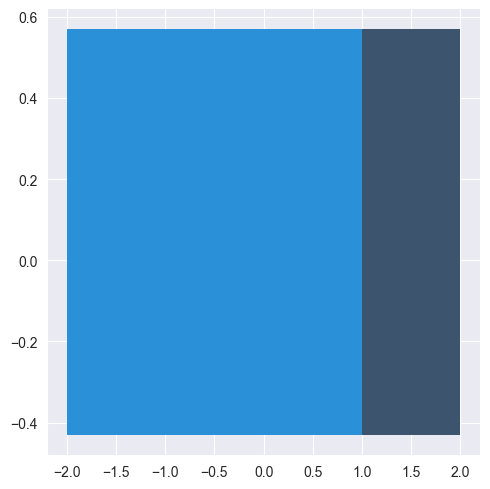

In [51]:
sns.displot(x = [i for i in range(-2,3)], y = t.pdf(t_stat, df = 2259))

<h1>Paired t-tests</h1>

<h2>US Republican presidents dataset</h2>

In [52]:
repub_votes_potus_08_12 = pd.read_feather("Data/repub_votes_potus_08_12.feather")
repub_votes_potus_08_12

,state,county,repub_percent_08,repub_percent_12
0,Alabama,Hale,38.957877,37.139882
1,Arkansas,Nevada,56.726272,58.983452
2,California,Lake,38.896719,39.331367
3,California,Ventura,42.923190,45.250693
4,Colorado,Lincoln,74.522569,73.764757
...,...,...,...,...
95,Wisconsin,Burnett,48.342541,52.437478
96,Wisconsin,La Crosse,37.490904,40.577038
97,Wisconsin,Lafayette,38.104967,41.675050
98,Wyoming,Weston,76.684241,83.983328


In [53]:
sample_data  = repub_votes_potus_08_12
sample_data['diff'] = sample_data['repub_percent_08'] - sample_data['repub_percent_12']
sample_data

,state,county,repub_percent_08,repub_percent_12,diff
0,Alabama,Hale,38.957877,37.139882,1.817995
1,Arkansas,Nevada,56.726272,58.983452,-2.257179
2,California,Lake,38.896719,39.331367,-0.434648
3,California,Ventura,42.923190,45.250693,-2.327503
4,Colorado,Lincoln,74.522569,73.764757,0.757812
...,...,...,...,...,...
95,Wisconsin,Burnett,48.342541,52.437478,-4.094937
96,Wisconsin,La Crosse,37.490904,40.577038,-3.086134
97,Wisconsin,Lafayette,38.104967,41.675050,-3.570083
98,Wyoming,Weston,76.684241,83.983328,-7.299087


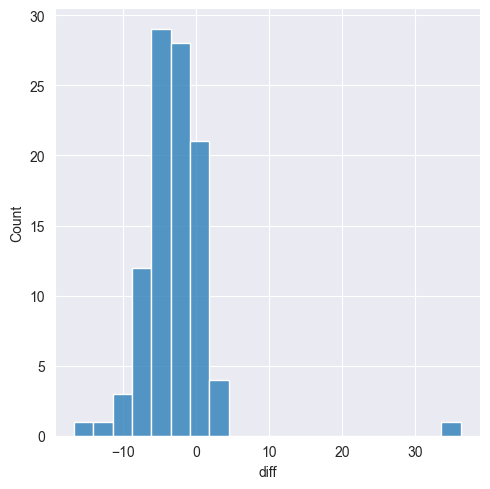

In [54]:
sns.displot(sample_data['diff'], bins = 20)
plt.show()
plt.close()

In [55]:
xbar_div = sample_data['diff'].mean()
xbar_div

-2.877109041242944

In [56]:
df = len(sample_data['diff']) - 1

In [57]:
s_diff = np.std(sample_data['diff'])
s_diff

5.110989665505294

In [58]:
t_stat = (xbar_div - 0)/np.sqrt(s_diff**2/len(sample_data['diff']))
t_stat, df

(-5.629260142435644, 99)

In [59]:
from scipy.stats import t
p_values = t.cdf(t_stat, df = df )
p_values

8.458652559404504e-08

<h2>Testing differences between two means using ttest()</h2>

In [61]:
import pingouin

pingouin.__version__

ModuleNotFoundError: No module named 'pingouin'